<h2 style="color:Tomato;"> Predicting if a person buy insurance or not</h2>

In [23]:
# import all the libs
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [24]:
insurance = pd.read_csv('insurance_data.csv')

In [25]:
df = pd.DataFrame(insurance)

In [26]:
df.shape
df.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


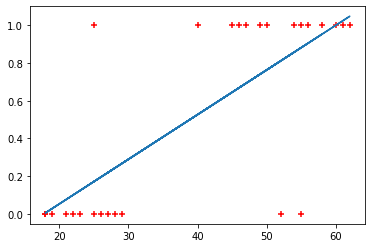

In [36]:
plt.scatter(df.age,df.bought_insurance,marker="+",color='red')
from sklearn.linear_model import LinearRegression

lreg=LinearRegression().fit(df[['age']],df.bought_insurance)
y_pred = lreg.predict(df[['age']])
plt.plot(df.age,y_pred)

# The line show the linear regression 
# if an outlier is there this will make problem

In [37]:
# score
lreg.score(df[['age']],df.bought_insurance)

0.5364021643885126

##  sklearn  logistice regression

### Step 1: Split the dataset into train and test

In [59]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df[['age']],df.bought_insurance,test_size=.2)

### Step 2: Model creation

In [60]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [61]:
# fit the model
model.fit(X_train,y_train)

LogisticRegression()

In [62]:
y_pred = model.predict(X_test)

In [63]:
y_pred

array([0, 1, 1, 1, 1, 1])

In [90]:
pd.options.display.float_format = '{:.2f}'.format 
np.set_printoptions(suppress=True)
print(model.predict_proba(X_test))
# the below shows the probability of 0 and then 1



[[0.8925775  0.1074225 ]
 [0.10266326 0.89733674]
 [0.04501951 0.95498049]
 [0.02937193 0.97062807]
 [0.217319   0.782681  ]
 [0.0684156  0.9315844 ]]


array([0.8925775 , 0.10266326, 0.04501951, 0.02937193, 0.217319  ,
       0.0684156 ])

#### coefficiten (m)

In [65]:
model.coef_

array([[0.14776968]])

#### Intercept (b)

In [66]:
model.intercept_

array([-5.51604619])

#### Score

In [67]:
model.score(X_test,y_test)

0.8333333333333334

In [68]:
model.score(X_train,y_train)

0.9047619047619048

#### Logistice regression plot

/opt/anaconda3/envs/jenv/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

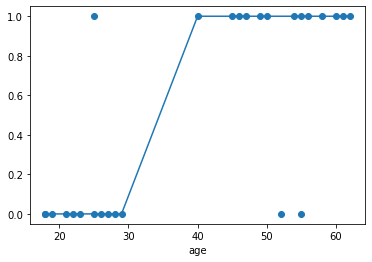

In [75]:

plt.scatter(df.age,df.bought_insurance)
sns.lineplot(df.age,model.predict(df[['age']]))

####  Probability curve

/opt/anaconda3/envs/jenv/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

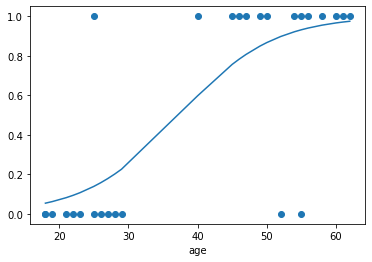

In [88]:
plt.scatter(df.age,df.bought_insurance)
# line plot will plot the line in ascending order of the points
# lineplot age vs probability of 1
sns.lineplot(df.age,model.predict_proba(df[['age']])[:,1])

#### Define the fuction manually

In [98]:
import math
def sigmoid(z):
    return (1/(1+math.exp(-z)))

In [112]:
def predicts(age):
    z = age*0.14776968-5.51604619
    y =sigmoid(z)
    if y<=.5: return 0 
    else: return 1

In [127]:

predicts(37.5)

1

In [126]:
model.predict([[37.5]])

/opt/anaconda3/envs/jenv/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1])